# Sprint Challenge
## *Data Science Sprint 13*

After a sprint of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). The data is sampled for you to something more manageable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. 

## Challenge Objectives
Successfully complete all these objectives to earn full credit. 

**Successful completion is defined as passing all the unit tests in each objective.**  

There are 8 total possible points in this sprint challenge. 


There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on Yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

____

# Before you submit your notebook you must first

1) Restart your notebook's Kernel

2) Run all cells sequentially, from top to bottom, so that cell numbers are sequential numbers (i.e. 1,2,3,4,5...)
- Easiest way to do this is to click on the **Cell** tab at the top of your notebook and select **Run All** from the drop down menu. 

3) **Comment out the cell that generates a pyLDAvis visual in objective 4 (see instructions in that section).** 
____

### Part 0: Import Necessary Packages
For this section, you will need to import:
- `spacy` 
- `Pandas`
- `Seaborn`
- `Matplotlib`
- `NearestNeighbors`
- `Pipeline` 
- `TfidfVectorizer`
- `KneighborsClassifier`
- `GridSearchCV`
- `corpora`
- `LdaModel`
- `gensim`
- `re`

> **Note: This assignment is optimized to work with these specific packages. You can use import different packages, but note that this may affect how CodeGrade works, and may cause CodeGrade to fail.**

In [ ]:
# YOUR CODE HERE
#!python -m spacy download en_core_web_md
#raise NotImplementedError()

2022-12-07 10:33:45.116815: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42.8 MB 83 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import spacy 
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.pipeline import Pipeline
import gensim
import gensim.corpora as corpora

In [ ]:
# Visible Testing

assert pd.__package__ == 'pandas'




### Part 0: Import Data

In [ ]:


# Load reviews from URL
data_url = 'https://raw.githubusercontent.com/bloominstituteoftechnology/data-science-practice-datasets/main/unit_4/unit1_nlp/review_sample.json'
df1 = pd.read_csv(data_url, sep='delimiter')
#raise NotImplementedError()
df2 = pd.DataFrame(df1.columns)
df2.columns = ['review']
df1.columns = ['review']
df = pd.concat([df2, df1], axis=0)
df = df.reset_index(drop=True)
def str_dict(s):
  import json
  h = json.loads(s)
  return h['text']
def stars_dict(s):
  import json
  h = json.loads(s)
  return h['stars']
df['text'] = df['review'].apply(str_dict)
df['stars'] = df['review'].apply(stars_dict)


/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [ ]:
df


,review,text,stars
0,"{""business_id"":""nDuEqIyRc8YKS1q1fX0CZg"",""cool""...","BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",1
1,"{""business_id"":""eMYeEapscbKNqUDCx705hg"",""cool""...",Came here for lunch Togo. Service was quick. S...,4
2,"{""business_id"":""6Q7-wkCPc1KF75jZLOTcMw"",""cool""...",I've been to Vegas dozens of times and had nev...,3
3,"{""business_id"":""k3zrItO4l9hwfLRwHBDc9w"",""cool""...",We went here on a night where they closed off ...,1
4,"{""business_id"":""6hpfRwGlOzbNv7k5eP9rsQ"",""cool""...","3.5 to 4 stars\n\nNot bad for the price, $12.9...",4
...,...,...,...
9995,"{""business_id"":""1h3ysSuSazvXc1aeLiiOew"",""cool""...",My family and I were hungry and this Subway is...,1
9996,"{""business_id"":""Rwahe1zbFpw6VIjb5ngZeg"",""cool""...",My wife and I came here with a a couple of fri...,3
9997,"{""business_id"":""8itGZAOBMiTbHKOwLuh4_Q"",""cool""...",The food was just OK and not anything to brag ...,2
9998,"{""business_id"":""A5Rkh7UymKm0_Rxm9K2PJw"",""cool""...",Today's visit is great!! Love and enjoy Town S...,4


In [ ]:
# Visible Testing
assert isinstance(df, pd.DataFrame), 'df is not a DataFrame. Did you import the data into df?'
assert df.shape[0] == 10000, 'DataFrame df has the wrong number of rows.'

## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- Accept one document at a time
- Return a list of tokens

You are free to use any method you have learned this week.

In [ ]:
# Optional: Consider using spaCy in your function. The spaCy library can be imported by running this cell.
# A pre-trained model (en_core_web_sm) has been made available to you in the CodeGrade container.
# If you DON'T need use the en_core_web_sm model, you can comment it out below.

nlp = spacy.load('en_core_web_sm')

In [ ]:
def tokenize(doc):
  d = nlp(doc)
  tokens = []
  for token in d:
    if (not token.is_punct) and (not token.is_stop) and (not token.is_digit) and (not token.like_num) and (token.lemma_.strip()!= ""):
      tokens.append(token.lemma_.lower().strip())
  return tokens

# YOUR CODE HERE
#raise NotImplementedError()


In [ ]:
'''Testing'''
assert isinstance(tokenize(df.sample(n=1)['text'].iloc[0]), list), "Make sure your tokenizer function accepts a single document and returns a list of tokens!"

## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews (i.e. create a doc-term matrix).
    * Name that doc-term matrix `dtm`

In [ ]:
%%time
vect = TfidfVectorizer(stop_words='english', min_df=.1)
tf_idf = vect.fit_transform(df.text)
dtm = pd.DataFrame(tf_idf.todense(), columns=[vect.get_feature_names()])
dtm
#raise NotImplementedError()

CPU times: user 709 ms, sys: 16.8 ms, total: 726 ms
Wall time: 750 ms


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,amazing,best,better,came,come,definitely,delicious,did,didn,don,...,place,really,recommend,restaurant,service,staff,time,try,ve,went
0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.706692,0.0,0.000000,0.000000
1,0.0,0.000000,0.0,0.508688,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.363028,0.489918,0.000000,0.0,0.000000,0.000000
2,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.458475,0.482862
3,0.0,0.471551,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.337706,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.498485
4,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.559617,0.579968,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
9996,0.0,0.000000,0.0,0.367976,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.627462,0.0,0.383967,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
9997,0.0,0.000000,0.0,0.000000,0.505774,0.0,0.0,0.000000,0.000000,0.0,...,0.342644,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
9998,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000



2. Write a fake review. Assign the text of the review to an object called `fake_review`. 
3. Query the fake review for the 10 most similar reviews, print the text of the reviews. 
    - Given the size of the dataset, use `NearestNeighbors` model for this. Name the model `nn`.

In [ ]:
# Create and fit a NearestNeighbors model named "nn"
# YOUR CODE HERE
top_n_neigh = 10
fake_review = "the food was definitely delicious"
fake_review_tok = fake_review.split()
fake_review_vect = vect.transform(fake_review_tok).toarray()

nn = NearestNeighbors(n_neighbors=top_n_neigh)
nn.fit(dtm)
#raise NotImplementedError()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


NearestNeighbors(n_neighbors=10)

In [ ]:
'''Testing.'''
assert nn.__module__ == 'sklearn.neighbors._unsupervised', ' nn is not a NearestNeighbors instance.'
assert nn.n_neighbors == 10, 'nn has the wrong value for n_neighbors'

In [ ]:
# Create a fake review and find the 10 most similar reviews
n_dist, n_ind = nn.kneighbors(fake_review_vect)
# YOUR CODE HERE
#raise NotImplementedError()

In [ ]:
# Visible Testing
assert isinstance(fake_review, str), "Did you write a review in the correct data type?"

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a pipeline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier.
    - Use that pipeline to train a model to predict the `stars` feature (i.e. the labels). 
    - Use that pipeline to predict a star rating for your fake review from Part 2. 



2. Create a parameter dict including `one parameter for the vectorizer` and `one parameter for the model`. 
    - Include 2 possible values for each parameter
    - **Use `n_jobs` = 1** 
    - Due to limited computational resources on CodeGrader `DO NOT INCLUDE ADDITIONAL PARAMETERS OR VALUES PLEASE.`
    
    
3. Train the entire pipeline with a GridSearch
    - Name your GridSearch object as `gs`

In [ ]:
# YOUR CODE HERE
vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2), min_df=2)
clf = RandomForestClassifier()
pipe = Pipeline([('vect', vect), ("clf", clf)])
parameters = {'vect__max_df': [.20, .25],
             'clf__max_depth': [50, 100]}
gs = GridSearchCV(pipe, parameters, cv=3, n_jobs=-1, verbose=1)
gs.fit(df.text, df.stars)
#raise NotImplementedError()

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(min_df=2,
                                                        ngram_range=(1, 2),
                                                        stop_words='english')),
                                       ('clf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'clf__max_depth': [50, 100],
                         'vect__max_df': [0.2, 0.25]},
             verbose=1)

In [ ]:
# Visible Testing
prediction = gs.predict(["This is your prediction statement."])[0]
assert prediction in df.stars.values, 'You gs object should be able to accept raw text within a list. Did you include a vectorizer in your pipeline?'

## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
    - Set num_topics to `5`
    - Name your LDA model `lda`
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

When you instantiate your LDA model, it should look like this: 

```python
lda = LdaModel(corpus=corpus,
               id2word=id2word,
               random_state=723812,
               num_topics = num_topics,
               passes=1
              )

```

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

## Note about  pyLDAvis

**pyLDAvis** is the Topic modeling package that we used in class to visualize the topics that LDA generates for us.

You are welcomed to use pyLDAvis if you'd like for your visualization. However, **you MUST comment out the code that imports the package and the cell that generates the visualization before you submit your notebook to CodeGrade.** 

Although you should leave the print out of the visualization for graders to see (i.e. comment out the cell after you run it to create the viz). 

### 1. Estimate a LDA topic model of the review text

* Use the `tokenize` function you created earlier to create tokens.
* Create an `id2word` object. 
> Hint: Use `corpora.Dictionary`
* Create a `corpus` object.
> Hint: Use `id2word.doc2bow`
* Instantiate an `lda` model. 

>> Remember to read the LDA docs for more information on the various class attributes and methods available to you in the LDA model: https://radimrehurek.com/gensim/models/ldamodel.html

In [ ]:
# Do not change this value 
num_topics = 5


In [ ]:
# YOUR CODE HERE
df['lemmas'] = df['text'].apply(tokenize)
id2word = corpora.Dictionary(df["lemmas"])
id2word.filter_extremes(no_below=2, no_above=0.5)
corpus = [id2word.doc2bow(doc_lemmas) for doc_lemmas in df['lemmas']]
lda = gensim.models.LdaModel(corpus=corpus,id2word=id2word, random_state=723812, num_topics = num_topics, passes=1)
#raise NotImplementedError()

#### Testing

In [ ]:
# Visible Testing

assert lda.get_topics().shape[0] == 5, 'Did your model complete its training? Did you set num_topics to 5?'


#### 2. Create 1-2 visualizations of the results. Assign one of the visualizations to a variable called `visual_plot`.


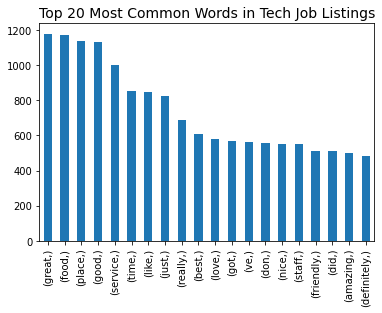

In [ ]:

# Use a ploting tool of your choice to visualize your results. 
top_n = 20
sorted_terms = dtm.sum().sort_values(ascending=False)
plt.title("Top {} Most Common Words in Tech Job Listings".format(top_n), fontsize=14)
visual_plot = sorted_terms[:top_n].plot(kind='bar')
#raise NotImplementedError()

In [ ]:
# Visible Testing
assert visual_plot.__module__ == 'matplotlib.axes._subplots', "You must create and assign to visual_plot a visualization"
